# Data Work

## Imports/Pathways

In [28]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [29]:
# File pathway shortcut
path = r'C:\Users\Chase\anaconda_projects\Exercise 4\07-2025 Instacart Basket Analysis'

In [30]:
# Import original datasets

orders = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'), index_col=False)

In [31]:
# Import original datasets

orders_products_prior = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders_products_prior.csv'), index_col=False)

In [32]:
# Import original datasets

products = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'), index_col=False)

In [33]:
# Import original datasets

departments = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col=False)

In [34]:
# Import original datasets

customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col=False)

In [35]:
# Imported prepared datasets
departments_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [36]:
# Imported prepared datasets
orders_checked = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_checked.csv'))

In [37]:
# Imported prepared datasets
orders_wrangled = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_wrangled.csv'))

In [38]:
# Imported prepared datasets
products_checked = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_checked.csv'))

In [39]:
# Prepared file - Orders_Products_Customers_Merge (Clean)
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers_merged.pkl'))

In [47]:
# ords+prods_merge to export as pickle file
# Prepared file - Orders_Products_Merge (Clean)
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_temp.pkl'))

## Data Inspection

In [40]:
# Rename df_final with df_final_data_work to keep og file safe
df_final_data_work = df_final

In [41]:
df_final_data_work.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag
0,2,33120,1,1,202279,3,5,9,8.0,False,Organic Egg Whites,86.0,16.0,11.3,both,Mid-range product,Regularly busy,Most orders,8,New customer
1,2,28985,2,1,202279,3,5,9,8.0,False,Michigan Organic Kale,83.0,4.0,13.4,both,Mid-range product,Regularly busy,Most orders,8,New customer
2,2,9327,3,0,202279,3,5,9,8.0,False,Garlic Powder,104.0,13.0,3.6,both,Low-range product,Regularly busy,Most orders,8,New customer
3,2,45918,4,1,202279,3,5,9,8.0,False,Coconut Butter,19.0,13.0,8.4,both,Mid-range product,Regularly busy,Most orders,8,New customer
4,2,30035,5,0,202279,3,5,9,8.0,False,Natural Sweetener,17.0,13.0,13.7,both,Mid-range product,Regularly busy,Most orders,8,New customer


In [42]:
print(df_final.columns.tolist())

['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'first_order', 'product_name', 'aisle_id', 'department_id', 'prices', '_merge', 'price_range', 'busiest_day', 'busiest_period_of_day', 'max_order', 'loyalty_flag']


## OG Data Counts

In [ ]:
# OG data counts
print("orders:", orders.shape[0])
print("orders_products_prior:", orders_products_prior.shape[0])
print("products:", products.shape[0])
print("customers:", customers.shape[0])

## Prepared Data Counts

In [ ]:
# Prepared data counts
print("departments_wrangled:", departments_wrangled.shape[0])
print("orders_checked:", orders_checked.shape[0])
print("orders_wrangled:", orders_wrangled.shape[0])
print("products_checked:", products_checked.shape[0])

## Flag Counts

#### First_orders

In [ ]:
first_order_counts = df_final_data_work['first_order'].value_counts()
first_order_percent = df_final_data_work['first_order'].value_counts(normalize=True) * 100
print(pd.DataFrame({'Count': first_order_counts, '% of Total Orders': first_order_percent.round(1)}))

#### Merge

In [ ]:
merge_counts = df_final_data_work['_merge'].value_counts()
merge_percent = df_final_data_work['_merge'].value_counts(normalize=True) * 100
merge_summary = pd.DataFrame({
    '_merge': merge_counts.index,
    'Count': merge_counts.values,
    '% of Total Rows': merge_percent.round(1).astype(str) + '%'
})
print(merge_summary)

#### Price Range

In [16]:
# if statement - product price range
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [17]:
# Create new column for price range
df_final_data_work['price_range'] = df_final_data_work.apply(price_label, axis=1)

In [18]:
df_final_data_work[['prices', 'price_range']].head(10)

,prices,price_range
0,11.3,Mid-range product
1,13.4,Mid-range product
2,3.6,Low-range product
3,8.4,Mid-range product
4,13.7,Mid-range product
5,10.7,Mid-range product
6,11.5,Mid-range product
7,11.5,Mid-range product
8,7.5,Mid-range product
9,11.8,Mid-range product


In [19]:
# Count of each price range
price_counts = df_final_data_work['price_range'].value_counts(dropna=False)

In [20]:
# Percentage of each price range
price_percent = df_final_data_work['price_range'].value_counts(normalize=True, dropna=False) * 100

In [21]:
# Combine into a summary DataFrame
price_summary = pd.DataFrame({
    'Price Range': price_counts.index,
    'Count': price_counts.values,
    '% of Total Orders': price_percent.round(1).astype(str) + '%'
})

In [22]:
# Display the summary
print(price_summary)

                         Price Range     Count % of Total Orders
price_range                                                     
Mid-range product  Mid-range product  21866565             67.4%
Low-range product  Low-range product  10126883             31.2%
High range                High range    412551              1.3%
Not enough data      Not enough data     30200              0.1%


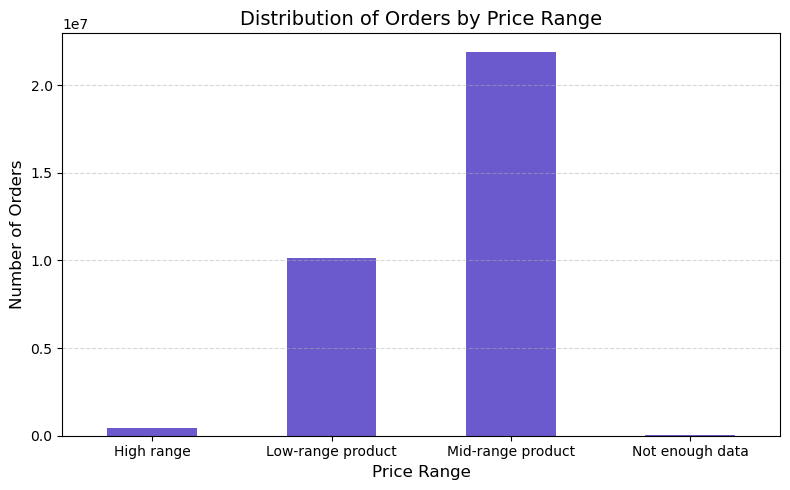

In [23]:
# Count orders per price range
price_range_counts = df_final['price_range'].value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
price_range_counts.plot(kind='bar', color='slateblue', ax=ax)

# Labeling
ax.set_title('Distribution of Orders by Price Range', fontsize=14)
ax.set_xlabel('Price Range', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
# Export chart
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_price_range_distribution.png'), dpi=300)

#### Spending Flag

In [ ]:
# Calculate average price per user
user_avg_price = df_final_data_work.groupby('user_id')['prices'].mean().reset_index()
user_avg_price['avg_price'] = user_avg_price['prices']

In [ ]:
# Define spending flag function
def spending_category(x):
    return 'Low spender' if x < 10 else 'High spender'

In [ ]:
# Apply flag
user_avg_price['spending_flag'] = user_avg_price['avg_price'].apply(spending_category)

In [ ]:
# Merge back into working DataFrame
df_final_data_work = df_final_data_work.merge(
    user_avg_price[['user_id', 'spending_flag']],
    on='user_id',
    how='left'
)

In [ ]:
# Count of each spending category
spending_counts = df_final_data_work['spending_flag'].value_counts(dropna=False)

In [ ]:
# Percentage of each category
spending_percent = df_final_data_work['spending_flag'].value_counts(normalize=True, dropna=False) * 100

In [ ]:
# Combine into a summary DataFrame
spending_summary = pd.DataFrame({
    'Spending Category': spending_counts.index,
    'Count': spending_counts.values,
    '% of Total': spending_percent.round(1).astype(str) + '%'
})

In [ ]:
print(spending_summary)

#### Order Frequency

In [ ]:
print(df_final_data_work.columns)

In [ ]:
# Calculate median days between orders per user
user_medians = df_final_data_work.groupby('user_id')['days_since_prior_order'].median().reset_index()
user_medians.rename(columns={'days_since_prior_order': 'median_days'}, inplace=True)

In [ ]:
# Define frequency flag function
def order_frequency_flag(median):
    if median > 20:
        return 'Non-frequent customer'
    elif 10 <= median <= 20:
        return 'Regular customer'
    else:
        return 'Frequent customer'

In [ ]:
# Apply flag
user_medians['order_frequency_flag'] = user_medians['median_days'].apply(order_frequency_flag)

In [ ]:
# Count of each frequency category
frequency_counts = user_medians['order_frequency_flag'].value_counts(dropna=False)

In [ ]:
# Percentage of each category
frequency_percent = user_medians['order_frequency_flag'].value_counts(normalize=True, dropna=False) * 100

In [ ]:
# Combine into a summary DataFrame
frequency_summary = pd.DataFrame({
    'Order Frequency Category': frequency_counts.index,
    'Count': frequency_counts.values,
    '% of Total': frequency_percent.round(1).astype(str) + '%'
})

In [ ]:
print(frequency_summary)

## Line Chart

In [ ]:
# Mapping of day numbers to names
day_labels = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Get order counts sorted by day index
order_counts = df_final_data_work['orders_day_of_week'].value_counts().sort_index()

# Create line chart
fig, ax = plt.subplots(figsize=(10, 6))
order_counts.plot(kind='line', marker='o', color='cornflowerblue', ax=ax)

# Labeling
ax.set_title('Order Volume by Day of Week', fontsize=14)
ax.set_xlabel('Day of Week (0–6)', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.set_xticks(range(0, 7))
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend box with day mappings
legend_labels = [f"{num} = {name}" for num, name in day_labels.items()]
legend_text = "\n".join(legend_labels)
props = dict(boxstyle='round', facecolor='white', edgecolor='gray')
ax.text(1.05, 0.5, legend_text, transform=ax.transAxes,
        fontsize=10, verticalalignment='center', bbox=props)

# Insight below chart
plt.figtext(0.5, 0.01, "Order volume peaks on weekends—Saturday leads, midweek dips suggest re-engagement opportunities.", ha='center', fontsize=10)

# Export the chart
plt.tight_layout()
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_by_day_with_legend.png'), dpi=300)
plt.show()

In [ ]:
# Save chart
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_orders_by_day.png'), dpi=300)

#### Violin Chart

In [ ]:
# Get top 3 aisles by frequency
top_aisles = df_final_data_work['aisle_id'].value_counts().head(3).index

# Filter data to top 3 aisles
df_top = df_final_data_work[df_final_data_work['aisle_id'].isin(top_aisles)]

# Group and calculate average price range
avg_prices = df_top.groupby('aisle_id')['price_range'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_prices, x='aisle_id', y='price_range', palette='Blues_d')

# Labeling
plt.title('Average Price Range by Top 3 Aisles', fontsize=14)
plt.xlabel('Aisle ID')
plt.ylabel('Average Price Range ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Export
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_price_range_top3_aisles.png'), dpi=300)
plt.show()

In [ ]:
print(df_final_data_work.columns.tolist())

## Top 5 Departments

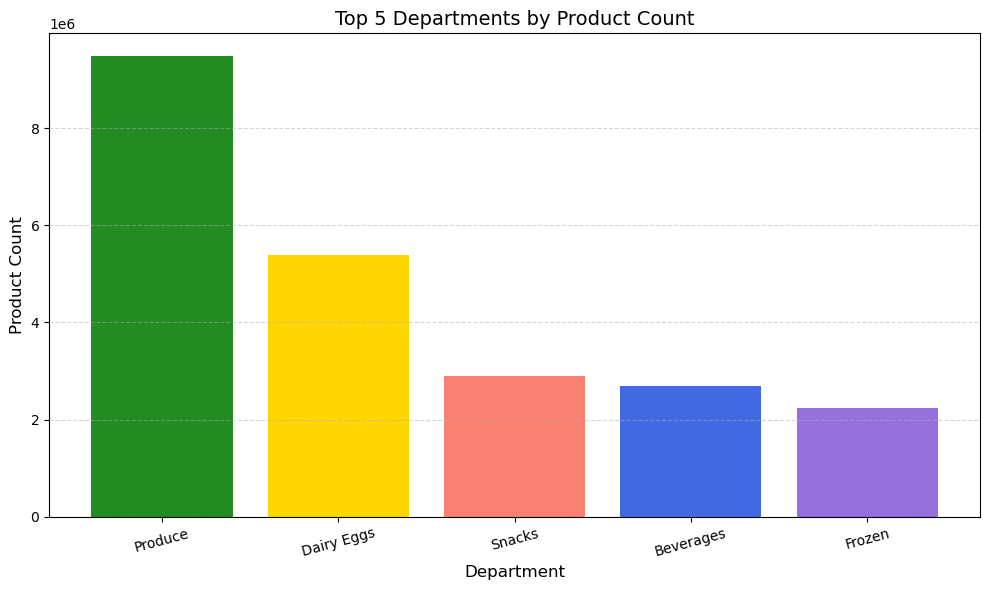

In [51]:
# Creating a bar chart from data already discovered
# Data
departments = ['Produce', 'Dairy Eggs', 'Snacks', 'Beverages', 'Frozen']
product_counts = [9479291, 5398747, 2887550, 2688123, 2234743]
colors = ['forestgreen', 'gold', 'salmon', 'royalblue', 'mediumpurple']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(departments, product_counts, color=colors)

# Labeling
ax.set_title('Top 5 Departments by Product Count', fontsize=14)
ax.set_xlabel('Department', fontsize=12)
ax.set_ylabel('Product Count', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15)
plt.tight_layout()

# Export
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_top_departments_product_count.png'), dpi=300)

# Show
plt.show()

In [52]:
# Save the chart
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_top_departments_product_count.png'), dpi=300)

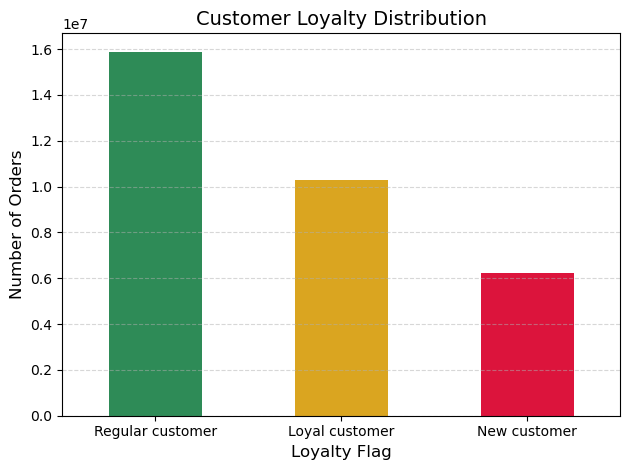

In [54]:
# Create the bar chart with 3 custom colors
bar_loyalty = df_final['loyalty_flag'].value_counts().plot.bar(
    color=['seagreen', 'goldenrod', 'crimson']
)

# Chart labeling
plt.title('Customer Loyalty Distribution', fontsize=14)
plt.xlabel('Loyalty Flag', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# Show
plt.show()

In [55]:
# Export
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'), dpi=300)